In [155]:
from nltk.corpus import brown
import numpy as np

In [20]:
from collections import Counter
token_counts = Counter(adventure_tokens)

In [149]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=True)
from sklearn.linear_model import Perceptron
from sklearn import tree

## The Brown Corpus is a good dataset to begin training with
The corpus is split into genres or categories shown below. 

In [12]:
categories = brown.categories()

In [11]:
# Count of words per section in the Brown Corpus
dict(zip(categories, [len(brown.words(categories=cat)) for cat in categories]))

{'adventure': 69342,
 'belles_lettres': 173096,
 'editorial': 61604,
 'fiction': 68488,
 'government': 70117,
 'hobbies': 82345,
 'humor': 21695,
 'learned': 181888,
 'lore': 110299,
 'mystery': 57169,
 'news': 100554,
 'religion': 39399,
 'reviews': 40704,
 'romance': 70022,
 'science_fiction': 14470}

## Build a classifier to tell us whether a text is Adventure or Romance

In [127]:
classes = ['adventure', 'romance']

In [14]:
adventure_tokens = brown.words(categories='adventure')

In [33]:
romance_tokens = brown.words(categories='romance')

Before we start extracting features from our data, let's split the data into training, test, and dev sets so that we can evaluate our neural network once we have finished. 

Let's do a 75 / 15 / 10 split between training, test, and dev sets.

In [107]:
def split(dataset, train=0.80, test=0.20, dev=None):
    train_end = round(len(dataset) * train)
    if dev:
        test_end = train_end + round(len(dataset) * test)
        return dataset[:train_end], dataset[train_end:test_end], dataset[test_end:]
    else:
        return dataset[:train_end], dataset[train_end:]

In [109]:
## A good idea to test our function here
# test = list(range(1,1806))
# split(test, train=0.75, test=0.15, dev=0.10)

In [111]:
adventure_train, adventure_test, adventure_dev = split(adventure_tokens,
                                                       train=0.75,
                                                       test=0.15,
                                                       dev=0.10)

romance_train, romance_test, romance_dev = split(romance_tokens,
                                                       train=0.75,
                                                       test=0.15,
                                                       dev=0.10)

Next we need to start extracting features. We already have our tokens, let's start by creating a list of features that say whether or not we saw a given word in the text.

While we do that, think about what other types of features you think would be useful in differentiating between adventure and romance texts.

In [112]:
len(adventure_train)

52006

Our first step in creating a list of features that indicate if we saw a given word is to find out what the vocabulary is. The vocabulary is the set of all word types we encountered.

In [35]:
# First we need to add in a zero count for all vocab then add counts for each observed
vocab = set(adventure_tokens+romance_tokens)
len(vocab)

13469

In [163]:
def get_feature_dict(X, vocab):
    # take one training example and return a sparse feature vector
    # init feature vec with zeros
    feature_vec = np.zeros(len(vocab), dtype=int)
    feature_dict = dict(zip(vocab, feature_vec))
    for fx in X: 
        # ensure that feature is already in vocab
        if fx in feature_dict.keys():
            feature_dict[fx] = 1  # one hot encoding
    return feature_dict

In [168]:
D_train = [get_feature_dict(adventure_train, vocab), get_feature_dict(romance_train, vocab)]
D_test = [get_feature_dict(adventure_test, vocab), get_feature_dict(romance_test, vocab)]

# D_train = [Counter(set(c+'_train')) for c in classes]
# D_test = [Counter(set(c+'_test')) for c in classes]
# D_dev = [Counter(set(c+'_dev')) for c in classes]

# D_train = [Counter(set(adventure_train)), Counter(set(romance_train))]
# D_test = [Counter(set(adventure_test)), Counter(set(romance_test))]
# D_dev = [Counter(set(adventure_dev)), Counter(set(romance_dev))]

# For this exercise we will be using One Hot Encoding. We could disable this and get the counts by removing the set() function above.

What is D?

D is a convention of Scikit Learn that represents an array of dictionaries. These dictionaries can be plugged into SKlearn's DictVectorizer to give us our numpy arrays that we will train and test our neural network on later.

Since we have two classes, romance and adventure, we have two dictionaries in our collection D.

Once we have added all of our features and their counts for each set of examples we will fit them into our feature vector using: X = v.fit_transform(D)

In [122]:
# D_train[0]

So far we have a dictionary for each class that shows which word types appear in that text. We have repeated this for each test set (train, test, dev). This set of features will probably be useful for our model, but a more useful set of features might be the bigrams or trigrams that appear. Let's add those to the dictionaries, D.

In [169]:
X_train = v.fit_transform(D_train)
X_test = v.fit_transform(D_test)

In [170]:
X_train

<2x13469 sparse matrix of type '<class 'numpy.float64'>'
	with 14313 stored elements in Compressed Sparse Row format>

In [173]:
X_test

<2x13469 sparse matrix of type '<class 'numpy.float64'>'
	with 4613 stored elements in Compressed Sparse Row format>

In [171]:
classifier = Perceptron().fit(X_train, classes)

In [175]:
classifier.predict(X_train)

array(['adventure', 'romance'], 
      dtype='<U9')

In [ ]:
def fit_and_evaluate_one(classifier, train_set, test_set):
    y_train = [y_[0] for y_ in train_set]
    X_train = [x[1] for x in train_set]
    y_test = [y_[0] for y_ in test_set]
    X_test = [x[1] for x in test_set]
    
    # fitting
    classifier.fit(X_train, y_train)
    
    # accuracy
    results = {}
    y_hat_train = classifier.predict(X_train)
    accur_train = sum(y_hat_train == y_train) / len(y_train)  # train accuracy
    y_hat_test = classifier.predict(X_test)
    accur_test = sum(y_hat_test == y_test) / len(y_test)  # test accuracy
    results['accur_train'] = accur_train
    results['accur_test'] = accur_test

    return results

In [125]:
Perceptron.predict(X_train)

TypeError: predict() missing 1 required positional argument: 'X'

What does this sparse parameter do?

# Talk about conceptoin of classfying fake news

# Write case study  for tagging

# Case study on social media monitoring
gave ability ot see trends in marketplace as they ebbed and flowed over time. 

# Write a post on getting data and cleaning for machine learning

Let's find out a little about our dataset

In [21]:
most_common = token_counts.most_common(50)

In [28]:
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

In [31]:
most_common

[('.', 4057),
 (',', 3488),
 ('the', 3370),
 ('and', 1622),
 ('a', 1354),
 ('of', 1322),
 ('to', 1309),
 ('``', 998),
 ("''", 995),
 ('was', 914),
 ('in', 847),
 ('his', 776),
 ('he', 761),
 ('I', 652),
 ('had', 591),
 ('He', 522),
 ('?', 518),
 ('that', 494),
 ('it', 492),
 ('on', 460),
 ('her', 444),
 ('him', 415),
 ('The', 410),
 ('with', 401),
 ('you', 362),
 ('for', 331),
 ('at', 317),
 ('!', 314),
 ('as', 310),
 ('said', 287),
 ('out', 266),
 ('from', 260),
 ('were', 251),
 ('she', 240),
 ('up', 226),
 (';', 216),
 ('--', 213),
 ('me', 207),
 ('they', 206),
 ('this', 203),
 ('but', 197),
 ('would', 191),
 ('be', 183),
 ('into', 180),
 ('not', 179),
 ('my', 168),
 ('all', 167),
 ('back', 165),
 ('man', 165),
 ('one', 162)]

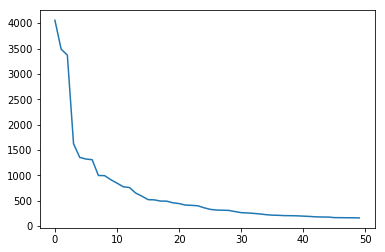

In [32]:
plt.plot([count[1] for count in most_common])